<a href="https://colab.research.google.com/github/CamilaSDantas/Performance-Evaluation/blob/main/ADS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!sudo apt install cm-super dvipng texlive-latex-extra texlive-latex-recommended > /dev/null

In [ ]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
import statsmodels.api as sm
from sympy import *
from functools import reduce
from IPython.display import display, Markdown, Latex
from scipy.interpolate import lagrange
from numpy.polynomial.polynomial import Polynomial
from sklearn.preprocessing import PolynomialFeatures, SplineTransformer
from sklearn.pipeline import make_pipeline

%matplotlib inline

init_printing(use_latex=True)

plt.rcParams["figure.figsize"]=15,5
plt.rc('text', usetex=True)

matplotlib.rcParams['text.latex.preamble'] = [r'\usepackage{amsmath}']


In [ ]:
xs, ys = symbols('x y', real=True)
fs = Function('\hat{f}', real=True)

def model_formula(params):
  return Equality(ys, sum([arg * xs ** i for (i, arg) in enumerate(params)]))

def statsmodels_predict(m, *args):
  v = m.predict([1, *args])
  return Equality(fs(*args), v[0])

def f_value(f, *args):
  v = f(*args)
  return Equality(fs(*args), v)



# Q6

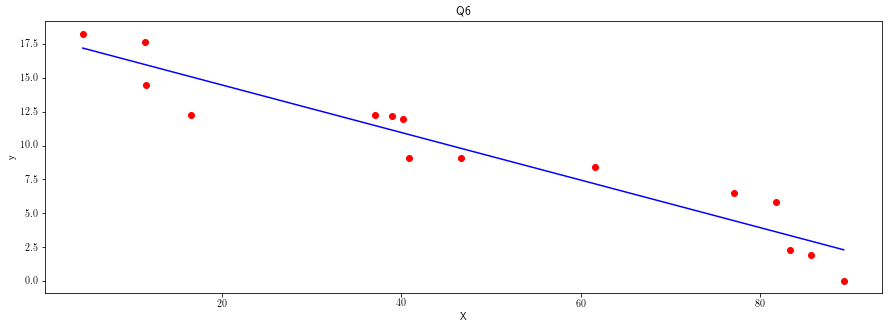

In [ ]:
X = np.array([4.5, 11.4, 11.5, 16.6, 37.1, 39.0, 40.2, 40.8, 46.6, 61.6, 77.1, 81.7, 83.3, 85.6, 89.3]).reshape((-1, 1))
y = np.array([18.3, 17.7, 14.5, 12.3, 12.3, 12.2, 12.0, 9.1, 9.1, 8.4, 6.5, 5.8, 2.3, 1.9, 0.0])

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
display(model_formula(model.params))

plt.scatter(X[:,1], y, color = 'red')
plt.plot(X[:,1], model.predict(X), color = 'blue')
plt.title('Q6')
plt.xlabel('X')
plt.ylabel('y')
plt.show()
print()
display(statsmodels_predict(model, 50))
display(statsmodels_predict(model, 93))


1 | $y = 0.644755604385329 x + 11.6189714579584$

2 | $y = - 0.0750527723393373 x^{2} + 1.86102526359738 x + 8.11846684969512$

3 | $y = 0.0176245680430605 x^{3} - 0.501800633742185 x^{2} + 4.72857209163675 x + 3.48486609368219$

4 | $y = - 0.00140788109843389 x^{4} + 0.0626564773073581 x^{3} - 0.976145895600683 x^{2} + 6.5602573223571 x + 1.52560895348041$

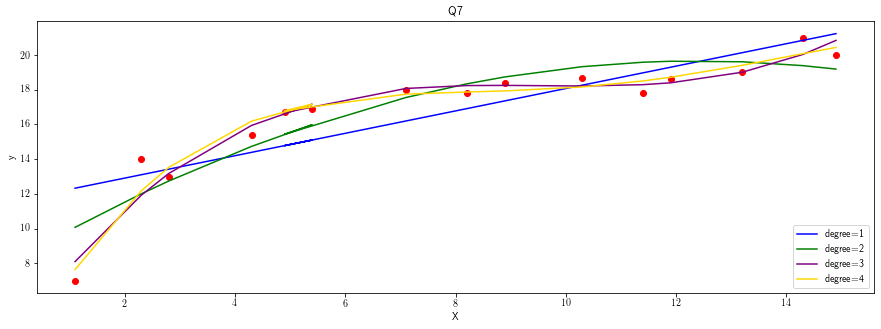

,Degree,R Square,Column_C,E,ε,freedom
0,1.0,0.714788,0.692849,118.557661,47.306339,13.0
1,2.0,0.847558,0.822151,70.289647,25.284705,12.0
2,3.0,0.949869,0.936197,52.516376,8.314871,11.0
3,4.0,0.957669,0.940737,39.710709,7.021166,10.0


In [ ]:
X = np.array([1.1, 2.3, 2.8, 4.3, 5.4, 4.9, 7.1, 8.2, 8.9, 10.3, 11.4, 11.9, 13.2, 14.3, 14.9]).reshape((-1, 1))
y = np.array([7.00, 14.00, 13.00, 15.40, 16.90, 16.70, 18.00, 17.80, 18.40, 18.70, 17.80, 18.60, 19.00, 21.00, 20.00])

results = []

for degree, color  in [(1, 'blue'), (2, 'green'),  (3, 'purple'), (4, 'gold')]:
  poly = PolynomialFeatures(degree=degree, include_bias=False)
  poly_features = poly.fit_transform(X)
  poly.fit(poly_features, y)

  poly_features = sm.add_constant(poly_features)
  model = sm.OLS(y, poly_features).fit()
  results.extend([degree, model.rsquared, model.rsquared_adj, model.mse_model, model.ssr, model.df_resid])
  
  display(Markdown('{} | {}'.format(degree,latex(model_formula(model.params), mode='inline'))))
  plt.plot(X, model.predict(poly_features), color=color, label=f'degree={degree}')

plt.scatter(X, y, color='red')
plt.title('Q7')
plt.xlabel('X')
plt.ylabel('y')
plt.legend(loc="lower right")
plt.show()
display(pd.DataFrame(np.array(results).reshape(-1, 6), columns = ['Degree','R Square','Column_C', 'E', 'ε', 'freedom']))

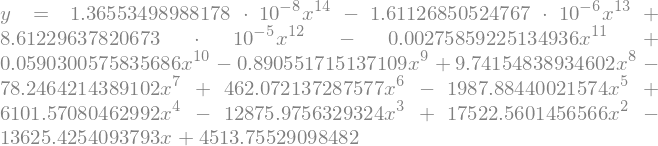

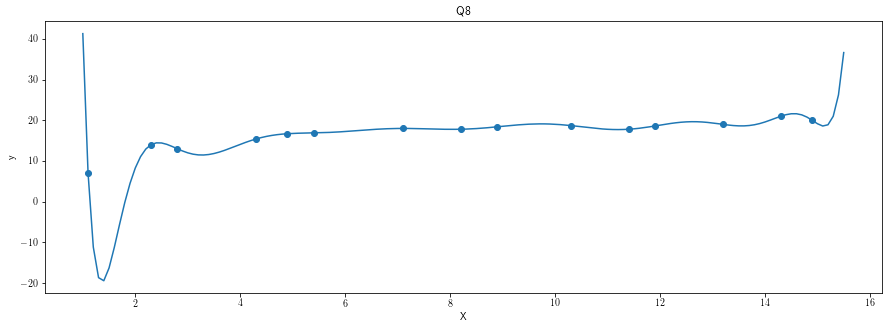

In [ ]:
X = np.array([1.1, 2.3, 2.8, 4.3, 5.4, 4.9, 7.1, 8.2, 8.9, 10.3, 11.4, 11.9, 13.2, 14.3, 14.9])
y = np.array([7.00, 14.00, 13.00, 15.40, 16.90, 16.70, 18.00, 17.80, 18.40, 18.70, 17.80, 18.60, 19.00, 21.00, 20.00])

f = lagrange(X, y)
display(model_formula(f.coef[::-1]))

x_new = np.arange(1, 15.6, 0.1)

plt.scatter(X, y)
# monta gráfico da função no intervalo [1, 15.6]
plt.plot(x_new, f(x_new))

plt.title('Q8')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

print()
display(f_value(f, 5.0))
display(f_value(f, 9.2))
